# Importing required libraries

In [115]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pickle
import pandas as pd
import seaborn as sns

# Reading data from dataset

In [63]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values #all the numerical features 
y = dataset.iloc[:, -1].values #label (or target)

In [64]:
#dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [65]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [66]:
dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


# Data Preprosessing

In [67]:
print(dataset.describe())
#Missing Data Check
print(dataset.isnull().sum())


            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


This dataset does not have any missing data

In [68]:
#Checking for duplicated values
dataset.duplicated().sum()

0

There are no duplicate values

In [69]:
# Dropping Unecessary columns
dataset.drop('User ID',axis=1,inplace=True)
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [83]:
#Converting Categorical data to numeric data
dataset['Gender'].replace(to_replace=['Male', 'Female'], value=[1,2], inplace=True)

Correlation between the features/variables are

In [84]:
cor = dataset.corr()
cor

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,0.073741,0.060435,0.042469
Age,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.060435,0.155238,1.000000,0.362083
Purchased,0.042469,0.622454,0.362083,1.000000


In [85]:
dataset['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [86]:
dataset.Age.describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

Average age of the considered population is around 37

In [87]:
dataset.EstimatedSalary.describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

Average Salary of the population is  around 70000

Checking if there is any relation between Age and Estimated salary

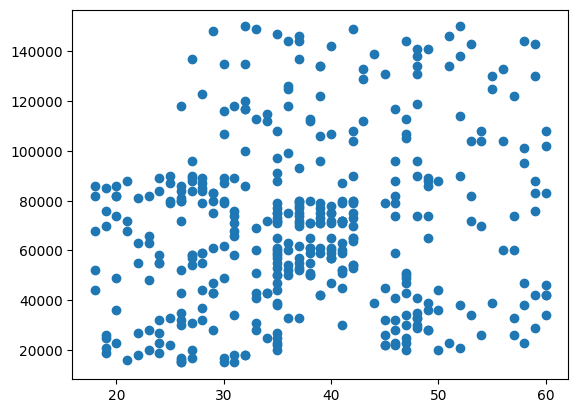

In [88]:
plt.scatter(dataset.Age, dataset.EstimatedSalary)

We do not observe any major dependencies between Age and Salaries

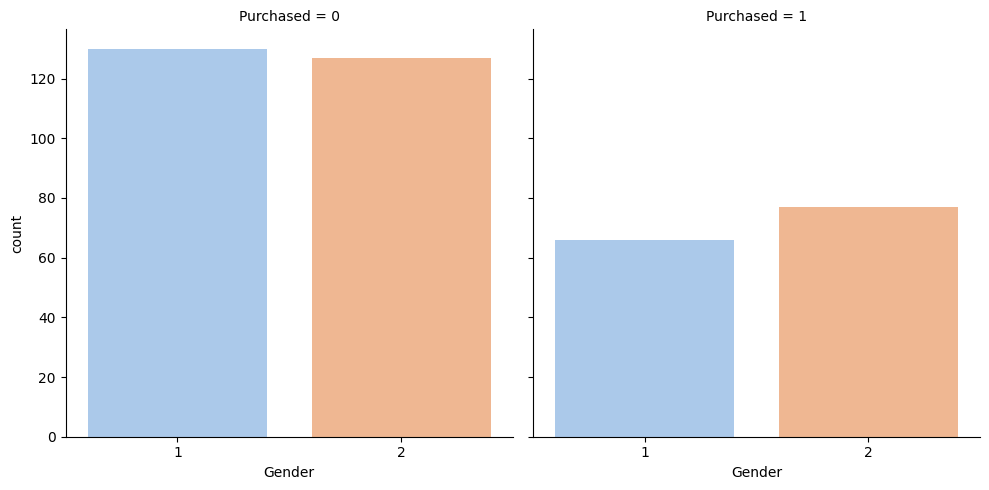

In [89]:
sns.catplot(x="Gender",col='Purchased', data=dataset, kind = 'count', palette='pastel')

In [90]:
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,2,26,43000,0
3,2,27,57000,0
4,1,19,76000,0


# Training

In [136]:
#Determining the columns that drive the decision of the "To purchase or not"
feature_cols = ['Gender','Age','EstimatedSalary']
X = dataset[feature_cols]
Y = dataset['Purchased']

In [92]:
#splitting dataset into training and testing sets(75% training and 25% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_test

,Gender,Age,EstimatedSalary
132,1,30,87000
309,2,38,50000
341,1,35,75000
196,2,30,79000
246,2,35,50000
...,...,...,...
146,2,27,96000
135,1,23,63000
390,1,48,33000
264,1,48,90000


In [93]:
X_train

,Gender,Age,EstimatedSalary
250,2,44,39000
63,1,32,120000
312,2,38,50000
159,2,32,135000
283,2,52,21000
...,...,...,...
323,2,48,30000
192,1,29,43000
117,1,36,52000
47,2,27,54000


In [94]:
y_train

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], d

In [95]:
X_test

,Gender,Age,EstimatedSalary
132,1,30,87000
309,2,38,50000
341,1,35,75000
196,2,30,79000
246,2,35,50000
...,...,...,...
146,2,27,96000
135,1,23,63000
390,1,48,33000
264,1,48,90000


# Decision Tree Classifier

In [106]:
from sklearn import tree

tr = tree.DecisionTreeClassifier()
tr.fit(X_train, y_train)
y_pred = tr.predict(X_test)
y_pred


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

Feature Scaling is required to normalize the data from within a specified minimum and maximum range

This step is needed to normalize the range of independent vavriables/features from a minimum to a maximum range

Training the model and implementing the Test set

In [108]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 10)
tr = tree.DecisionTreeClassifier()
tr.fit(X_train, y_train)
results = model_selection.cross_val_score(tr, X_train, y_train, cv = kfold)
results

array([0.8       , 0.8       , 0.76666667, 0.76666667, 0.93333333,
       0.7       , 0.9       , 0.86666667, 0.93333333, 0.9       ])

In [109]:
tr_train_score = tr.score(X_train, y_train)

tr_test_score= tr.score(X_test, y_test)


print('Decision Tree Classifier Train Score is : ' , tr_train_score)

print('Decision Tree Classifier Test Score is : ' , tr_test_score)

Decision Tree Classifier Train Score is :  1.0
Decision Tree Classifier Test Score is :  0.91


# Accuracy of the Classifier 

In [110]:
from sklearn.metrics import accuracy_score

tr_acc = accuracy_score(y_test, y_pred)
print('accuracy_score : ', tr_acc)

accuracy_score :  0.91


In [111]:
from sklearn import  metrics

tr_acc = 100*tr.score(X_test, y_test)
print('Decision Tree Classifier Predictions: \n', tr.predict(X_test), '\n Accuracy:', tr_acc, '%')

Decision Tree Classifier Predictions: 
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1] 
 Accuracy: 91.0 %


# Confusion Matrix

In [141]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


<Axes: >

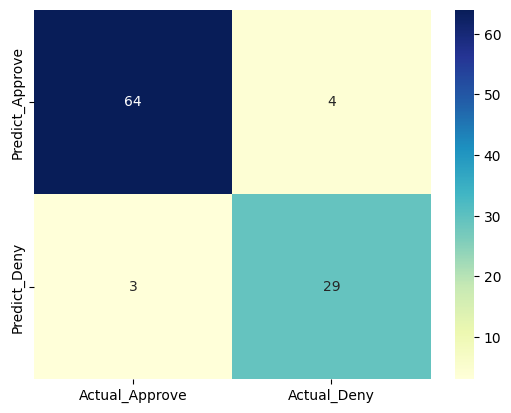

In [151]:
from sklearn.metrics import confusion_matrix
cm_matrix = pd.DataFrame(data=cm, columns=['Actual_Approve', 'Actual_Deny'], 
                                 index=['Predict_Approve', 'Predict_Deny'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Verification

In [124]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
cross_check

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,1
96,0,0
97,1,1
98,1,1


In [132]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn import datasets,tree
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
#Prepare the data
x = iris.data
y = iris.target
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(x, y)

# Plotting the decision tree

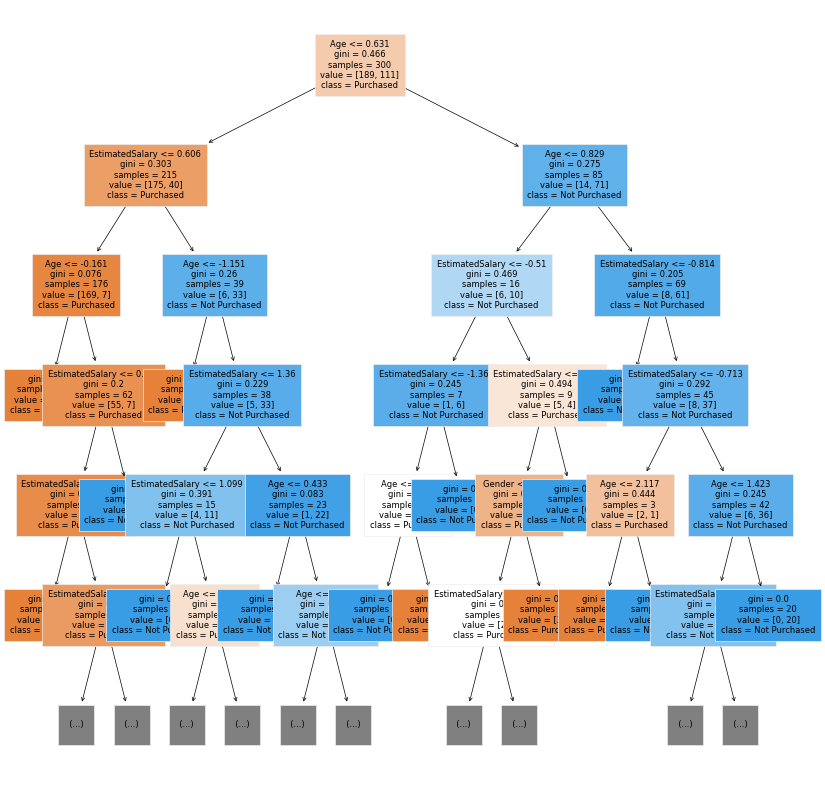

In [174]:

fn=['Gender', 'Age', 'EstimatedSalary']      
cn=['Purchased', 'Not Purchased']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=100)
tree.plot_tree(tr,
               feature_names = fn, 
               class_names=cn,
               fontsize=6,
               max_depth = 5,
               filled = True);

# KNN Model

In [137]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled  = sc.transform(X_test)

In [138]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [139]:
y_pred = classifier.predict(X_test_scaled)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [140]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

# Confusion Matrix

In [145]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[64  4]
 [ 3 29]]


<Axes: >

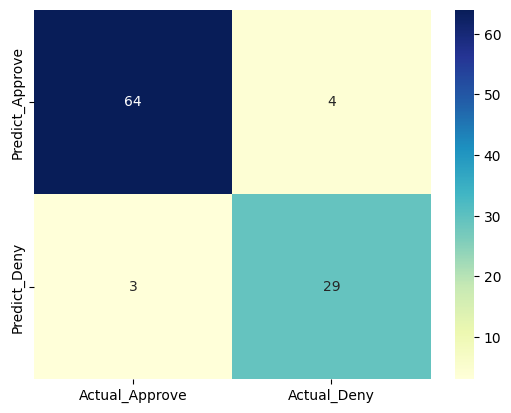

In [152]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual_Approve', 'Actual_Deny'], 
                                 index=['Predict_Approve', 'Predict_Deny'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Plotting for K values ranging from 1 to 30


In [168]:
testAccuracy = []
trainAccuracy = []
for k in range(1,30):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    trainAccuracy.append(model.score(X_train,y_train))
    testAccuracy.append(model.score(X_test,y_test))

In [166]:
from matplotlib import pyplot as plt,style
style.use('ggplot')

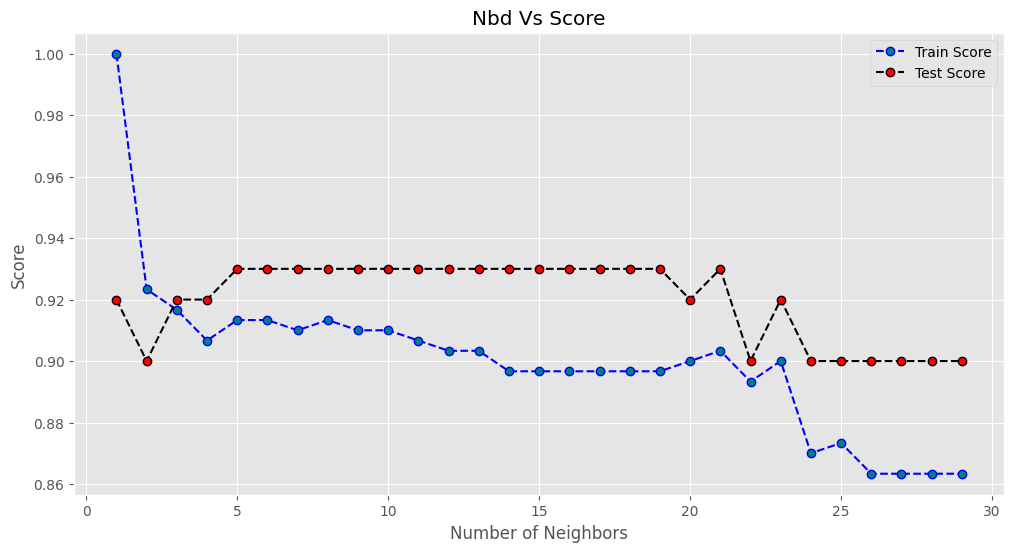

In [169]:
#create a plot using the information from the above loop
plt.figure(figsize=(12,6))
plt.plot(range(1,30),trainAccuracy,label="Train Score",marker="o",markerfacecolor="teal",color="blue",linestyle="dashed")
plt.plot(range(1,30),testAccuracy,label="Test Score",marker="o",markerfacecolor="red",color="black",linestyle="dashed")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.title("Nbd Vs Score")
plt.show()

The optimal value hence obtained is 4

Creating a model using K = 4

In [171]:
from sklearn.pipeline import Pipeline
model_steps_20=[('sipStanderise',StandardScaler()),('shipModel',KNeighborsClassifier(n_neighbors=8,metric='minkowski',p=2))]
pipelineModel=Pipeline(steps=model_steps_20)
pipelineModel.fit(X_train,y_train)
print("score is:"+ str(pipelineModel.score(X_train,y_train)))
print("********************************")
pipelineModel.score(X_test,y_test)
predic_test_y=pipelineModel.predict(X_train)
print(pd.crosstab(y_train,predic_test_y))

score is:0.9133333333333333
********************************
col_0    0    1
row_0          
0      174   15
1       11  100
